# Decision trees and random forest
## Preprocessing

In [19]:
#you first need to download the data from teams and put it in the same folder as this to be able to load the script
#here i load the libraries and set the theme to seaborn
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import datetime
sns.set_theme()

In [20]:
#here i read the csv file and save it in a dataframe
df= pd.read_csv('January_Schiphol_Time_Groups.csv')
df

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,Train_Delay,MaxNumberOfStops,weekday,day_of_week,Train_Departure_Planned_Time,Time_Group
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,0.0,10,4,Friday,64400,Morning_Rush_Hour
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,0.0,10,4,Friday,64800,Morning_Rush_Hour
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,0.0,10,4,Friday,70000,Morning_Rush_Hour
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,0.0,10,4,Friday,70200,Morning_Rush_Hour
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,0.0,10,4,Friday,70900,Morning_Rush_Hour
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,0.0,13,6,Sunday,225300,Night
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,0.0,6,6,Sunday,231000,Night
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,0.0,6,6,Sunday,234000,Night
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,0.0,6,6,Sunday,234600,Night


In [21]:
#here i make dummies from the different station names so i can use it for the random forest and decision trees algerithms
StationDummies=pd.get_dummies(df['Station_Name'])
StationDummies

,'s-Hertogenbosch,Almelo,Almere Centrum,Amersfoort,Amersfoort Schothorst,Amsterdam Bijlmer ArenA,Amsterdam RAI,Amsterdam Zuid,Apeldoorn,Apeldoorn Osseveld,...,Schiphol Airport,Sittard,Twello,Utrecht Centraal,Utrecht Overvecht,Veenendaal-De Klomp,Weert,Wierden,Wolfheze,Zaltbommel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76311,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76313,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#i also do this for the days of the week
DayDummies=pd.get_dummies(df['day_of_week'])
DayDummies

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
76310,0,0,0,1,0,0,0
76311,0,0,0,1,0,0,0
76312,0,0,0,1,0,0,0
76313,0,0,0,1,0,0,0


In [23]:
#for the time groups 
TimeDummies=pd.get_dummies(df['Time_Group'])
TimeDummies

,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
76310,0,0,0,0,1
76311,0,0,0,0,1
76312,0,0,0,0,1
76313,0,0,0,0,1


In [24]:
# an also for the train types
TrainDummies=pd.get_dummies(df['Train_Type'])
TrainDummies

,Extra trein,Intercity,Sprinter
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
76310,0,1,0
76311,0,1,0
76312,0,1,0
76313,0,1,0


In [25]:
#then i add all those dataframes with the dummies to the dataset
FinalDF=pd.concat([df, StationDummies, DayDummies, TimeDummies, TrainDummies], axis=1)
FinalDF

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,...,Tuesday,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,...,0,0,0,0,0,1,0,0,1,0
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,...,0,0,0,0,0,1,0,0,1,0
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,...,0,0,0,0,0,1,0,0,1,0
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,...,0,0,0,0,0,1,0,0,1,0
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,...,0,0,0,0,0,0,1,0,1,0
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,...,0,0,0,0,0,0,1,0,1,0
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,...,0,0,0,0,0,0,1,0,1,0
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,...,0,0,0,0,0,0,1,0,1,0


In [26]:
# and then last but not least i add the group if there is a train delay 
FinalDF['DelayOrNot'] = np.where(FinalDF['Train_Delay']<=60, 0, 1).astype(int)
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76315 entries, 0 to 76314
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    76315 non-null  int64  
 1   Station_Code                  76315 non-null  object 
 2   Station_Name                  76315 non-null  object 
 3   Train_Number                  76315 non-null  int64  
 4   Train_Type                    76315 non-null  object 
 5   Train_Company                 76315 non-null  object 
 6   Train_Destination_Planned     76315 non-null  object 
 7   Train_Destination_Actual      76315 non-null  object 
 8   Train_Departure_Planned       76315 non-null  object 
 9   Train_Departure_Actual        76315 non-null  object 
 10  Train_Delay                   76315 non-null  float64
 11  MaxNumberOfStops              76315 non-null  int64  
 12  weekday                       76315 non-null  int64  
 13  d

In [27]:
#then i import the function to split train and test data, select the y and x features and split the data into test and train data
from sklearn.model_selection import train_test_split

train_X = FinalDF.iloc[:, [11, 16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70]]
train_y = FinalDF['DelayOrNot']

X_train_train, X_test_train, y_train_train, y_test_train = train_test_split(train_X, train_y, test_size=0.2, random_state = 42)
train_X

,MaxNumberOfStops,'s-Hertogenbosch,Almelo,Almere Centrum,Amersfoort,Amersfoort Schothorst,Amsterdam Bijlmer ArenA,Amsterdam RAI,Amsterdam Zuid,Apeldoorn,...,Tuesday,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,10,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
76311,6,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
76312,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
76313,6,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Decision trees part 1

In [28]:
# then i import tree, decisiontreeclassifier and gridsearch 
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#and do a gridsearch to select the best values for the hyperparameters for the decision tree classifier
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}

clf_GS = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS.fit(train_X, train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [29]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: gini
Best max_depth: 5


[Text(0.5, 0.9166666666666666, 'X[8] <= 0.5\ngini = 0.424\nsamples = 76315\nvalue = [53071, 23244]'),
 Text(0.25, 0.75, 'X[14] <= 0.5\ngini = 0.393\nsamples = 62216\nvalue = [45523, 16693]'),
 Text(0.125, 0.5833333333333334, 'X[20] <= 0.5\ngini = 0.379\nsamples = 57789\nvalue = [43104, 14685]'),
 Text(0.0625, 0.4166666666666667, 'X[34] <= 0.5\ngini = 0.385\nsamples = 56020\nvalue = [41449, 14571]'),
 Text(0.03125, 0.25, 'X[11] <= 0.5\ngini = 0.396\nsamples = 49967\nvalue = [36397, 13570]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.403\nsamples = 47548\nvalue = [34245, 13303]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.196\nsamples = 2419\nvalue = [2152, 267]'),
 Text(0.09375, 0.25, 'X[52] <= 0.5\ngini = 0.276\nsamples = 6053\nvalue = [5052, 1001]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.258\nsamples = 5243\nvalue = [4444, 799]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.374\nsamples = 810\nvalue = [608, 202]'),
 Text(0.1875, 0.4166666666666667, 'X[42] <= 0.5\

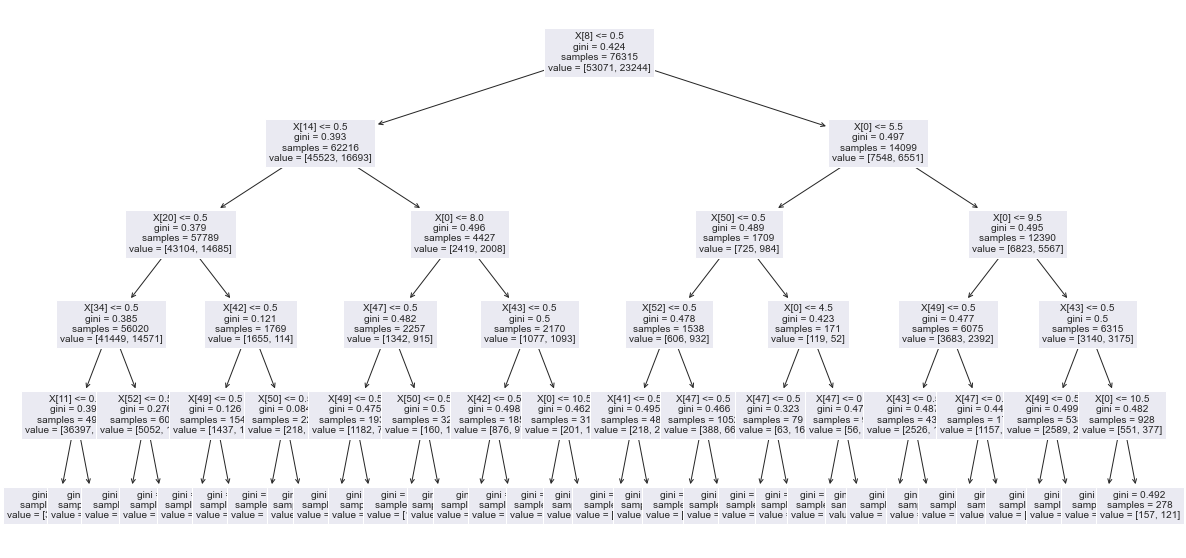

In [50]:
#here i make the desicion tree with the best parameters
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state = 42)
tree_clfFit = tree_clf.fit(train_X,train_y)
plt.figure(figsize=(20,10))
tree.plot_tree(tree_clfFit, fontsize=10)

### Evaluation

In [51]:
#here i first check what the percentage is with no delay so i dont get the wrong idea drom the accurately score
total=FinalDF.DelayOrNot.count()
delay=FinalDF.DelayOrNot.sum()
percentNoDelay=1-delay/total
print('percentage with no delay is',percentNoDelay)

percentage with no delay is 0.6954202974513529


In [52]:
#here i iimport metrics and accuracy score
from sklearn import metrics
from sklearn.metrics import accuracy_score
#and give the accuracy score for this model
y_pred = tree_clf.predict(X_test_train)
accuracy_score(y_test_train, y_pred)

0.7067417938806263

the accuracy score is around 70%, but the overall percent of no delay is 69% procent so that basically means that there is a  change that the model is not that good with predicting delays, but good in predicting no delays

In [53]:
#here i import the classification report
from sklearn.metrics import classification_report
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.72      0.94      0.82     10682
     class 2       0.54      0.17      0.26      4581

    accuracy                           0.71     15263
   macro avg       0.63      0.55      0.54     15263
weighted avg       0.67      0.71      0.65     15263



To know if this true i look at the classification report and it is pretty much true. the delays have a pretty high change on being predicted as no delay.

In [34]:
#here i import the cross validation score
from sklearn.model_selection import cross_val_score
#and then firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf, train_X, train_y, cv=5))
cross_val_score(tree_clf, train_X, train_y, cv=5).mean()

[0.69697962 0.69573478 0.69822446 0.70516936 0.70222106]


0.6996658586123304

the cross validation score is very close to the accuracy score, but becuase it still pretty low, if you consider the fact that if the model would only predict no delays the score would be 69%. so this is less then a 1% improvement on the 69%.

## Random forest part 1

In [74]:
#here i show the result form the gridsearch for the random forest model that i run in the kernel via a python file
pd.read_csv("GridSearchRandomForest.csv").drop('Unnamed: 0',axis=1)

,Best criterion,Best max_depth,Best n_estimators
0,gini,7,160


In [76]:
#here i import the random forest classifier
from sklearn.ensemble import RandomForestClassifier
#here i used the outcomes from the gridsearch to get the best possible outcome from the random forest model
forest_clf = RandomForestClassifier(criterion='gini', max_depth=7, random_state = 42, n_estimators = 160)
forest_clf.fit(train_X,train_y)
forest_clf

RandomForestClassifier(max_depth=7, n_estimators=160, random_state=42)

### Evaluation

In [77]:
#here i give the accuracy score for this model
y_pred1 = forest_clf.predict(X_test_train)
accuracy_score(y_test_train, y_pred1)

0.7019589857826115

the accuracy score of this one is pretty much the same as the decision trees one, just a bit worse. 

In [78]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.70      0.99      0.82     10682
     class 2       0.59      0.02      0.05      4581

    accuracy                           0.70     15263
   macro avg       0.64      0.51      0.43     15263
weighted avg       0.67      0.70      0.59     15263



If you look at the classification report it that is basically says that the most of them are no delay, which results in a higher precision score for the no delay class and a super high recall, which basically means that there are nearly no false negatives. for the delay group is basically said that there a a bigger amount of false positives and a huge amount of false negatives. the reason why the model acts like this is probably because the dataset is inbalanced. to try to fix it we will balance the data with down and up sampling.

In [79]:
#here i print the seperate cross validation scores and also the mean overall score
print(cross_val_score(forest_clf, train_X, train_y, cv=5))
cross_val_score(forest_clf, train_X, train_y, cv=5).mean()

[0.70104173 0.69619341 0.69645548 0.69848654 0.69848654]


0.6981327393041996

if you look at the cross validation score you see that its a bit lower then the one of the decision trees. A reason why the scores for both the models are not too good is becuase the data is bias, because there are far more no delays then delays (around 2/3 is no delay and 1/3 is delay). Too try to get better score i will make the groups around the same size.

## Decision trees part 2

In [40]:
#here i first make 2 groups, one with all the delays and one with the no delays
Delay=FinalDF[FinalDF['DelayOrNot']==1]
NoDelay=FinalDF[FinalDF['DelayOrNot']==0]
#then i count the amount of delays and no delays
DelayCount=Delay.Station_Code.count()
NoDelayCount=NoDelay.Station_Code.count()
#then i use the sample function so downsample the nodelay group based on the number of delays in the dataset
NoDelay_Under=NoDelay.sample(DelayCount, random_state=42)
#then i concatinate the delay group and the downsampled no delay group to make the new balanced dataset.
FinalDF_under=pd.concat([NoDelay_Under, Delay]).reset_index()
#then i set the x and y axis and devide the data in train and test data.
train_X2 = FinalDF_under.iloc[:, [12, 17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71]]
train_y2 = FinalDF_under['DelayOrNot']
X_train_train2, X_test_train2, y_train_train2, y_test_train2 = train_test_split(train_X2, train_y2, test_size=0.2, random_state = 42)

In [41]:
#here i look at the information from the new dataset
FinalDF_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46488 entries, 0 to 46487
Data columns (total 73 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         46488 non-null  int64  
 1   Unnamed: 0                    46488 non-null  int64  
 2   Station_Code                  46488 non-null  object 
 3   Station_Name                  46488 non-null  object 
 4   Train_Number                  46488 non-null  int64  
 5   Train_Type                    46488 non-null  object 
 6   Train_Company                 46488 non-null  object 
 7   Train_Destination_Planned     46488 non-null  object 
 8   Train_Destination_Actual      46488 non-null  object 
 9   Train_Departure_Planned       46488 non-null  object 
 10  Train_Departure_Actual        46488 non-null  object 
 11  Train_Delay                   46488 non-null  float64
 12  MaxNumberOfStops              46488 non-null  int64  
 13  w

In [42]:
#here i do the gridsearch to get the best values for the parameters
parameters = {'criterion':('gini', 'entropy'), 'max_depth': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
clf_GS = GridSearchCV(DecisionTreeClassifier(), parameters)
clf_GS.fit(train_X2, train_y2)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, 27, 28, 29, 30]})

In [43]:
#here i print the outcomes from the gridsearch
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best Criterion: entropy
Best max_depth: 22


In [86]:
#here i make the desicion tree with the best parameters
tree_clf2 = DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state = 42)
tree_clfFit2 = tree_clf2.fit(train_X2,train_y2)
plt.figure(figsize=(20,10))
#tree.plot_tree(tree_clfFit2, fontsize=10)

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

### Evaluation

In [55]:
#here i give the accuracy score for this model
y_pred2 = tree_clf2.predict(X_test_train2)
accuracy_score(y_test_train2, y_pred2)

0.6602495160249516

Now the accuracy score is 66% which is lower then the first 2 models, but because the 2 groups now both have the around the same amount of rows it is better I think, but the classification report has to indicate the same thing

In [56]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train2, y_pred2, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.70      0.55      0.62      4633
     class 2       0.63      0.77      0.69      4665

    accuracy                           0.66      9298
   macro avg       0.67      0.66      0.66      9298
weighted avg       0.67      0.66      0.66      9298



in comparising with the other 2 models this classification report is way better, the no delays have a 7% higher precision score (so a lower amount of false positives). the no delays do have a 22% lower recall score (so more false negatives). 

In [57]:
#here i firstly print the seperate scores and also the mean overall score
print(cross_val_score(tree_clf2, train_X2, train_y2, cv=5))
cross_val_score(tree_clf2, train_X2, train_y2, cv=5).mean()

[0.60593676 0.55183911 0.60141966 0.6158976  0.58158546]


0.5913357169941719

here i can see that the overall average cross validation score is 7% lower as the accuacy score. Overall i would say that this score indicates that the model is not good enough for use.

## Random forest part 2

In [80]:
#here i show the result form the gridsearch for the random forest model that i run in the kernel via a python file
pd.read_csv("GridSearchRandomForest4.csv").drop('Unnamed: 0',axis=1)

,Best criterion,Best max_depth,Best n_estimators
0,gini,5,40


In [58]:
#here i used the outcomes from the gridsearch to get the best possible outcome from the random forest model
forest_clf3 = RandomForestClassifier(criterion='gini', max_depth=5, random_state = 42, n_estimators = 40)
forest_clf3.fit(train_X2,train_y2)
forest_clf3

RandomForestClassifier(max_depth=5, n_estimators=40, random_state=42)

### Evaluation

In [60]:
#here i give the accuracy score for this model
y_pred3 = forest_clf3.predict(X_test_train2)
accuracy_score(y_test_train2, y_pred3)

0.603032910303291

You can see that the accuracy score is ^% lower then the desicion tree but to know for sure it its really a worse model i would have to look at the classification report and cross validation score

In [62]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train2, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.58      0.77      0.66      4633
     class 2       0.66      0.44      0.52      4665

    accuracy                           0.60      9298
   macro avg       0.62      0.60      0.59      9298
weighted avg       0.62      0.60      0.59      9298



this classification report is worse then the one of the model befoe it because the scores are overall lower and further appart. the no delay class is 8% worse in precision (so it has a higher number of false positives) and is 33% higher in recall (so it has way less number of false negatives).

In [63]:
#here i print the seperate cross validation scores and also the mean overall score
print(cross_val_score(forest_clf3, train_X2, train_y2, cv=5))
cross_val_score(forest_clf3, train_X2, train_y2, cv=5).mean()

[0.59959131 0.59227791 0.57689826 0.60804561 0.57308809]


0.5899802351838901

The average cross validation score is pretty close to the ones of the previous model, and is just a bit worse. So i can say that overall this model is acting worse.

## Random forest part 3

In [65]:
# We separate majority and minority classes
from sklearn.utils import resample
Delay
NoDelay

,Unnamed: 0,Station_Code,Station_Name,Train_Number,Train_Type,Train_Company,Train_Destination_Planned,Train_Destination_Actual,Train_Departure_Planned,Train_Departure_Actual,...,Wednesday,Afternoon_Rush_hour,Between_Rush_hours,Early_Morning,Morning_Rush_Hour,Night,Extra trein,Intercity,Sprinter,DelayOrNot
0,0,HRL,Heerlen,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:44:00,2016-01-01 06:44:00,...,0,0,0,0,1,0,0,1,0,0
1,1,EHV,Eindhoven,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 06:48:00,2016-01-01 06:48:00,...,0,0,0,0,1,0,0,1,0,0
2,2,STD,Sittard,3528,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:00:00,2016-01-01 07:00:00,...,0,0,0,0,1,0,0,1,0,0
3,3,DV,Deventer,1624,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:02:00,2016-01-01 07:02:00,...,0,0,0,0,1,0,0,1,0,0
4,4,HT,'s-Hertogenbosch,3524,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-01 07:09:00,2016-01-01 07:09:00,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76310,76310,HVS,Hilversum,1684,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 22:53:00,2016-01-31 22:53:00,...,0,0,0,0,0,1,0,1,0,0
76311,76311,AMF,Amersfoort,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:10:00,2016-01-31 23:10:00,...,0,0,0,0,0,1,0,1,0,0
76312,76312,DVD,Duivendrecht,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:40:00,2016-01-31 23:40:00,...,0,0,0,0,0,1,0,1,0,0
76313,76313,ASDZ,Amsterdam Zuid,11686,Intercity,NS,Schiphol Airport,Schiphol Airport,2016-01-31 23:46:00,2016-01-31 23:46:00,...,0,0,0,0,0,1,0,1,0,0


In [66]:
# Then upsample minority class
Delay_Over = resample(
    Delay,
    replace=True,  # sample with replacement
    n_samples=NoDelayCount,  # to match majority class
    random_state=42)  # reproducible results

In [67]:
#here i set the x and y and divide it into tran and test data.
FinalDF_over=pd.concat([NoDelay, Delay_Over]).reset_index()
train_X3 = FinalDF_over.iloc[:, [12, 17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71]]
train_y3 = FinalDF_over['DelayOrNot']
X_train_train3, X_test_train3, y_train_train3, y_test_train3 = train_test_split(train_X3, train_y3, test_size=0.2, random_state = 42)

In [68]:
#here i look at the info of the upsampled data.
FinalDF_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106142 entries, 0 to 106141
Data columns (total 73 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   index                         106142 non-null  int64  
 1   Unnamed: 0                    106142 non-null  int64  
 2   Station_Code                  106142 non-null  object 
 3   Station_Name                  106142 non-null  object 
 4   Train_Number                  106142 non-null  int64  
 5   Train_Type                    106142 non-null  object 
 6   Train_Company                 106142 non-null  object 
 7   Train_Destination_Planned     106142 non-null  object 
 8   Train_Destination_Actual      106142 non-null  object 
 9   Train_Departure_Planned       106142 non-null  object 
 10  Train_Departure_Actual        106142 non-null  object 
 11  Train_Delay                   106142 non-null  float64
 12  MaxNumberOfStops              106142 non-nul

In [81]:
#here i show the result form the gridsearch for the random forest model that i run in the kernel via a python file
pd.read_csv("GridSearchRandomForest2.csv").drop('Unnamed: 0',axis=1)

,Best criterion,Best max_depth,Best n_estimators
0,gini,13,130


In [82]:
#here i used the outcomes from the gridsearch to get the best possible outcome from the random forest model
forest_clf3 = RandomForestClassifier(criterion='gini', max_depth=13, random_state = 42, n_estimators = 130)
forest_clf3.fit(train_X3,train_y3)
forest_clf3

RandomForestClassifier(max_depth=13, n_estimators=130, random_state=42)

### Evaluation

In [83]:
#here i give the accuracy score for this model
y_pred3 = forest_clf3.predict(X_test_train3)
accuracy_score(y_test_train3, y_pred3)

0.660040510622262

You can see that the accuracy score is pretty much the same as the one from the decision tree part 2.

In [84]:
#here i print the classification report
target_names = ['class 1', 'class 2']
print(classification_report(y_test_train3, y_pred3, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.67      0.65      0.66     10728
     class 2       0.65      0.67      0.66     10501

    accuracy                           0.66     21229
   macro avg       0.66      0.66      0.66     21229
weighted avg       0.66      0.66      0.66     21229



If you look at precision and recall scores they are may closer to each other then of the previous models. which indicates that it should be a better model, but idk if that is the case because upsampling the data can influence this quite a bit by adding things that arent the case. (it basically adds train rides that dont exist which makes that data false, so the predictions are probably also worse even if the scores look better.)

In [85]:
#here i print the seperate cross validation scores and also the mean overall score
print(cross_val_score(forest_clf3, train_X3, train_y3, cv=5))
cross_val_score(forest_clf3, train_X3, train_y3, cv=5).mean()

[0.63432098 0.62692543 0.64721123 0.66101376 0.64980215]


0.6438547084378348

The cross validation is better then the previous models but like i mentioned before upsampling the data in this dataset makes adds rows of things that never happened in the first place which will probably make the data inaccurate.

## Conclusion
Score wise the cross last model with the upsampled data is the best but like i explained before this data is not trustworty because it adds rows with train rides that never happened in the first place. So then the best model is the decision tree with the downsampled data with an overall cross validation score of 59%. I would personally say that that is not trustworthy enough to be used in real life. so to try to improve the model i will first try to add another column with the information if the train reached the end destication and i can also try out other ways to down sample the data.